# Projeto: Análise dos Aluguéis do Rio de Janeiro com Python
Usando Python para analisar os dados de um dataset fictício dos alugueis do Rio de Janeiro

## Objetivos: 
Este dataset faz parte do treinamento de Pandas da Alura e o objetivo desse projeto é expandir o conhecimento adquirido no treinamento para além das funções básicas, utilizando outros recursos e outras formas de explorar esse dataset e promover uma análise sobre os dados.

## Extraindo e Explorando o dataset

In [1]:
# Registrando a versão do Python
versao =!python -V
print('Versão: ', versao)

Versão:  ['Python 3.8.8']


In [2]:
# Importando bibliotecas
import pandas as pd
# inline mostrara um gráfico estática na tela
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (10,8))
import seaborn as sns
sns.set_theme(style="ticks", palette="rocket")#registrando tema


In [3]:
# Importando dataset
df = pd.read_csv('dataset/aluguel.csv', sep=';')

#### Dicionário das variáveis

###### <b>Tipo :</b>Tipo do imóvel
###### <b>Bairro: </b>Bairro onde está localizado
###### <b>Quartos: </b>Quantidade de quartos do imóvel
###### <b>Vagas: </b>Quantidade de vagas do imóvel
###### <b>Suítes: </b>Quantidade de suítes do ímovel<
###### <b>Área: </b>Área do imóvel
###### <b>Valor: </b>Valor do Aluguel do imóvel
###### <b>Condomínio: </b>Valor do condomínio dos imóveis que possuem
###### <b>IPTU: </b>Valor do IPTU do imóvel
###### <b>Valor por m²: </b>Valor do m² do imóvel. Variável será criada 



In [4]:
# Visualizando os 5 primeiros registros do dataset
df.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [5]:
# Número de linhas e colunas inciais
df.shape

(32960, 9)

## Limpeza e Transformação

In [6]:
# Inserindo um nome para a coluna 
df.columns.name='ID'
df.head(5)

ID,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [7]:
# Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


É possível verificar que as variáveis Valor, Condomínio e IPTU tem dados nulos

In [8]:
# Definindo uma função para visualizar o total de nulos e seu percentual
def nulos(df):
    total = df.isnull().sum() 
    percent = df.isnull().sum()/df.isnull().count()
    missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
    missing_data[missing_data['percent']!=0]
    return missing_data

In [9]:
nulos(df)

,total,percent
ID,,
Tipo,0,0.000000
Bairro,0,0.000000
Quartos,0,0.000000
Vagas,0,0.000000
Suites,0,0.000000
Area,0,0.000000
Valor,17,0.000516
Condominio,4093,0.124181
IPTU,10237,0.310589


### Tratando a variável VALOR

Para está variável será realizada a exclusão desses registros com dados nulos

In [10]:
df[df['Valor'].isnull()].shape[0]

17

In [11]:
# Removendo missing values
A = df.shape[0]
df.dropna(subset = ['Valor'], inplace = True)
B = df.shape[0]
A - B

17

In [12]:
# Verificando se ainda há registro nulo para valor
df[df['Valor'].isnull()].shape[0]

0

### Tratando a variável CONDOMÍNIO

Para está variável será assumido que todo apartamento tem que ter valor de condomínio, portanto, os registros sem valor serão descartados

In [13]:
df[df['Condominio'].isnull()].shape[0]

4089

In [14]:
# Selecionando os registros dos apartamentos sem valor de condominio
selecao1 = (df['Tipo'] == 'Apartamento') & (df['Condominio'].isnull())

In [15]:
# Removendo registros
A = df.shape[0]
df = df[~selecao1] # colocamos o '~' na frente da seleção para que ele inverta a seleção 
B = df.shape[0]
A - B

745

In [16]:
# Verificando quantos registros nulos ficarão após a remoção
df[df['Condominio'].isnull()].shape[0]

3344

### Tratando as variáveis CONDOMÍNIO e IPTU

In [17]:
# Para os registros que permanecerem com valor nulo, vamos atribuir o valor 0
df = df.fillna({'Condominio': 0, 'IPTU': 0})
df

ID,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


In [18]:
# Chamando a função de nulo para verificar se ainda há algum valor nulo no dataframe
nulos(df)

,total,percent
ID,,
Tipo,0,0.0
Bairro,0,0.0
Quartos,0,0.0
Vagas,0,0.0
Suites,0,0.0
Area,0,0.0
Valor,0,0.0
Condominio,0,0.0
IPTU,0,0.0


### Salvando uma nova versão do dataset com as devidas correções

In [19]:
# Exportando como arquivo CSV
df.to_csv('dataset\df_limpo_v1.csv', sep=';', index = False)

In [20]:
# Lendo novo df
df = pd.read_csv('dataset\df_limpo_v1.csv', sep=';')
df.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0


In [21]:
tipos_imoveis = df.Tipo.drop_duplicates().to_list()
tipos_imoveis

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [22]:
len(tipos_imoveis)

22

Nota-se que há que há 22 tipos de imóveis entre residenciais e comerciais. A análise a ser realizada são somente dos imóveis residenciais, portanto, os comerciais podem ser descartados.

#### Selecionando imóveis residenciais

In [23]:
# Criando uma variável com uma lista somente de imóveis residenciais
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila']

In [24]:
# O método isin vai procurar no dataframe os valores contidos em residencial e se achar ficam como verdadeiro, senão como falso
selecao = df['Tipo'].isin(residencial)

In [25]:
# Será passada a seleção dos imóveis para o dataframe
df_residencial = df[selecao]
df_residencial.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


In [26]:
# Ajustando o index. Como pode ocorrer novamente, será definida uma função para ser utilizada novamente
def ajuste_index(df):
    df.index = range(df.shape[0])
    return df_residencial

ajuste_index(df_residencial)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Agora o dataframe está menor, mas contém apenas os dados que vamos analisar

### Tratando Outliers

In [27]:
# Criando variaveis do eixo
eixos = pd.DataFrame(df_residencial[['Tipo','Valor']])                                                

<AxesSubplot:xlabel='Tipo', ylabel='Valor'>

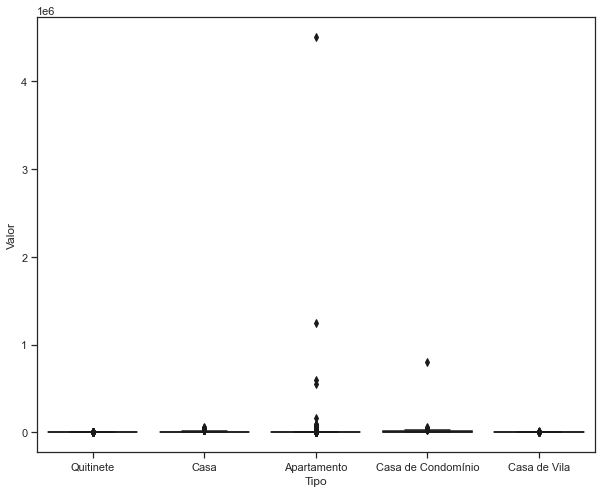

In [28]:
# Utilizando boxplot para visualizar os outliers
sns.boxplot(x='Tipo',
            y='Valor',
            data=eixos)

In [29]:
# Calculando quartis, intervalo interquartil e limites
grupo = df_residencial.groupby('Tipo')['Valor']
Q1 = grupo.quantile(0.25) 
Q3 = grupo.quantile(0.75)
IIQ = Q3 - Q1
LIMINF = Q1 - 1.5 * IIQ
LIMSUP = Q3 + 1.5 * IIQ

In [30]:
# Analise individualiza dos outliers por tipo
df_residencial2 = pd.DataFrame()
for tipo in grupo.groups.keys():
    o_tipo = df_residencial['Tipo'] == tipo # primeira selecao ele vai iterar pelo tipo
    dentro_lim = (df_residencial['Valor']>= LIMINF[tipo]) & (df_residencial['Valor']<= LIMSUP[tipo]) # segunda seleção vai iterar 
                                                                                                    #com valores dentro do limite
    selecao = o_tipo & dentro_lim # variável seleção agrupara os dados das duas variaveis anteriores
    dados_selecao = df_residencial[selecao]
    df_residencial2 = pd.concat([df_residencial2, dados_selecao])    

<AxesSubplot:xlabel='Tipo', ylabel='Valor'>

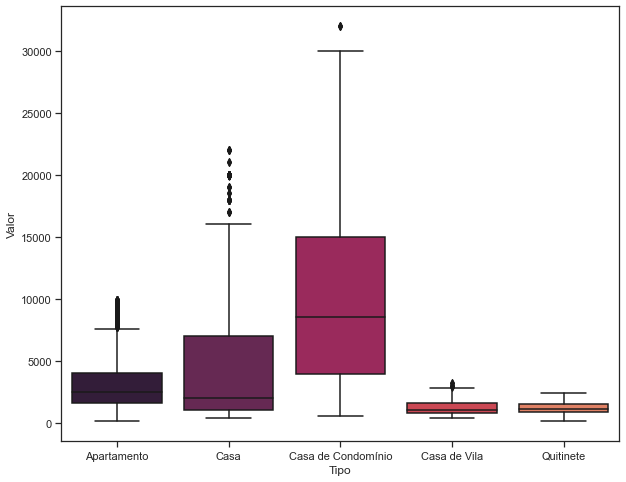

In [31]:
# Plotando novo gráfico para visualizar alterações
eixos = pd.DataFrame(df_residencial2[['Tipo','Valor']]) 
sns.boxplot(x='Tipo',
            y='Valor',
            data=eixos)

## Análise dos Dados de Imóveis Residenciais

### Estatística Descritiva

In [32]:
df_residencial2.describe().round(2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,19831.00,19831.00,19831.00,19831.00,19831.00,19831.00,19831.00
mean,2.41,1.20,0.82,120.27,3465.40,1386.19,433.98
std,1.03,13.96,1.03,126.60,3291.36,46692.23,3698.12
min,0.00,0.00,0.00,10.00,100.00,0.00,0.00
25%,2.00,0.00,0.00,62.00,1500.00,500.00,0.00
50%,2.00,1.00,1.00,85.00,2500.00,800.00,100.00
75%,3.00,2.00,1.00,130.00,4300.00,1336.00,294.00
max,14.00,1960.00,14.00,3000.00,32000.00,6552570.00,450625.00


O tratamento dos outliers será aplicadado para cada tipo de imóvel dentro da variável tipo, e não na variável completa.
Essa escolha é devido a caracteristica que cada imóvel tem na variação dos seus valores.

### Qual a distribuição dos imóveis?

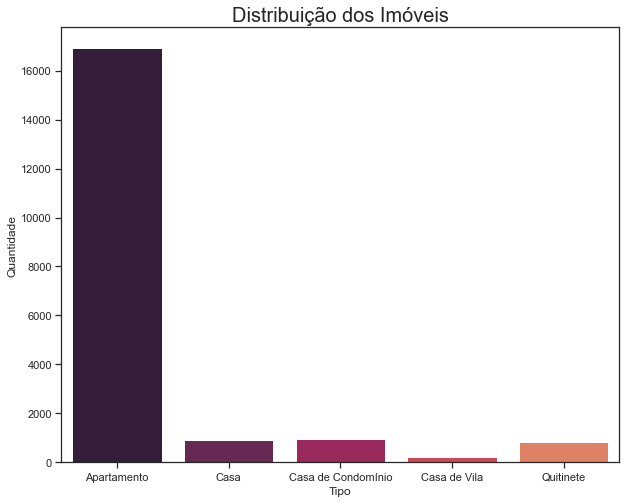

In [33]:
#plotando gráfico
fig = sns.countplot(x=df_residencial2.Tipo)
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Imóveis', size=20)
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

## Ranking dos 10 Aluguéis mais caros do Rio de Janeiro (sem condomínio e iptu)

In [34]:
ranking = df_residencial2[['Tipo', 'Bairro', 'Valor']].sort_values('Valor', ascending=False)
ranking.head(10)

,Tipo,Bairro,Valor
11828,Casa de Condomínio,Barra da Tijuca,32000.0
20212,Casa de Condomínio,Barra da Tijuca,32000.0
2371,Casa de Condomínio,Barra da Tijuca,32000.0
1860,Casa de Condomínio,Barra da Tijuca,30000.0
21456,Casa de Condomínio,Barra da Tijuca,30000.0
166,Casa de Condomínio,Barra da Tijuca,30000.0
21711,Casa de Condomínio,Barra da Tijuca,30000.0
2940,Casa de Condomínio,Barra da Tijuca,30000.0
20694,Casa de Condomínio,Barra da Tijuca,30000.0
17541,Casa de Condomínio,Barra da Tijuca,30000.0
